In [1]:
from IPython.display import display
import spot
from spot.jupyter import display_inline
spot.setup(show_default='.tvb')

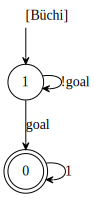

In [2]:
# System specification
aut_sys = spot.translate('F(goal)', 'Buchi', 'state-based', 'complete'); aut_sys.show("v")

In [3]:
# How to get rid of the redundant transition-based acceptance label from state 0 to 2?
print(aut_sys.to_str('hoa'))

HOA: v1
States: 2
Start: 1
AP: 1 "goal"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels state-acc complete
properties: deterministic stutter-invariant terminal
--BODY--
State: 0 {0}
[t] 0
State: 1
[0] 0
[!0] 1
--END--


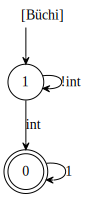

In [4]:
# Tester spec:
aut_test = spot.translate('F(int)', 'Buchi', 'state-based', 'complete'); aut_test.show("v")

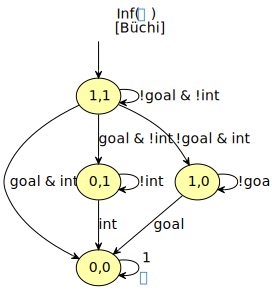

In [7]:
sync_prod = spot.product(aut_sys, aut_test); sync_prod

In [8]:
print(sync_prod.to_str('hoa'))

HOA: v1
States: 4
Start: 0
AP: 2 "goal" "int"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels state-acc complete
properties: deterministic stutter-invariant terminal
--BODY--
State: 0
[0&1] 1
[0&!1] 2
[!0&1] 3
[!0&!1] 0
State: 1 {0}
[t] 1
State: 2
[1] 1
[!1] 2
State: 3
[0] 1
[!0] 3
--END--


In [9]:
print(len(sync_prod.get_product_states()))

4


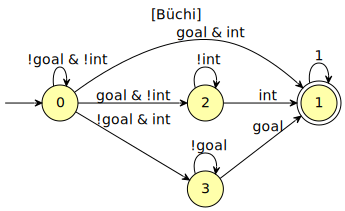

0: (1, 1)
1: (0, 0)
2: (0, 1)
3: (1, 0)


In [10]:
display(sync_prod.show('.1'))
pairs = sync_prod.get_product_states()
for s in range(sync_prod.num_states()):
    print("{}: {}".format(s, pairs[s]))